In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-01-01')['Adj Close']
data.head()

,PG
Date,
2007-01-03,43.143341
2007-01-04,42.815781
2007-01-05,42.448109
2007-01-08,42.541702
2007-01-09,42.434750


In [9]:
log_returns = np.log(data / data.shift(1))
log_returns.tail()

,PG
Date,
2020-06-22,-0.009887
2020-06-23,-0.000170
2020-06-24,-0.011190
2020-06-25,0.012548
2020-06-26,-0.022822


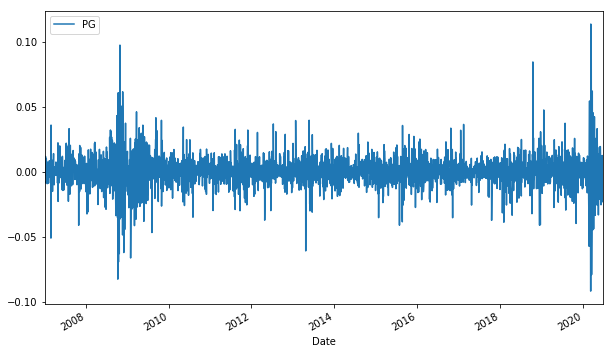

In [10]:
log_returns.plot(figsize=(10,6))

In [11]:
u = log_returns.mean()
var = log_returns.var()
u, var

(PG    0.000289
 dtype: float64, PG    0.000143
 dtype: float64)

In [12]:
# drift = u - 0.5 * var
drift = u - 0.5 * var
drift

PG    0.000218
dtype: float64

In [13]:
stdev = log_returns.std()
stdev

PG    0.011968
dtype: float64

In [14]:
#object.values gives an numpy array
drift.values

array([0.00021783])

In [15]:
stdev.values

array([0.0119681])

In [16]:
#get the  stddev multiplier for 95% confidence level
mul = norm.ppf(0.95)
mul

1.6448536269514722

In [17]:
#Create a 10x2 array using rand():
x = np.random.rand(10,2)
x

array([[0.1687973 , 0.79619423],
       [0.61227492, 0.22432552],
       [0.71259274, 0.09930909],
       [0.29631747, 0.83870146],
       [0.35589459, 0.65458063],
       [0.53241178, 0.31445956],
       [0.27203008, 0.50512019],
       [0.50376331, 0.68063145],
       [0.45411974, 0.52015846],
       [0.16320182, 0.97189782]])

In [18]:
# Find the distance from the mean in  terms of the standard deviation multiplers
norm.ppf(x)

array([[-0.95892884,  0.82810413],
       [ 0.28525321, -0.75766585],
       [ 0.56097508, -1.2854984 ],
       [-0.53502157,  0.98913502],
       [-0.36945423,  0.39771708],
       [ 0.08133386, -0.48324875],
       [-0.60668474,  0.01283477],
       [ 0.00943337,  0.46946527],
       [-0.11525945,  0.0505513 ],
       [-0.98138353,  1.90944777]])

In [19]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 1.38655226,  0.44033076],
       [ 0.48721033,  2.11768278],
       [ 0.41530436, -0.76488788],
       [-1.34406336, -0.85752922],
       [ 1.73023504, -1.59600538],
       [-0.78418393,  0.00609144],
       [-0.54474008, -0.48350736],
       [ 0.50764705, -2.83111015],
       [-0.16593928,  1.09227869],
       [ 0.55276497, -0.52888175]])

In [20]:
t_intervals = 1000
iterations = 10

In [22]:
# Calculate the daily return
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99809672, 0.9926162 , 0.98262967, ..., 1.01048404, 1.00129731,
        0.99385474],
       [0.99750691, 0.99928656, 0.97759359, ..., 1.00066376, 1.00472868,
        1.00998152],
       [1.00367933, 1.01156462, 0.98538526, ..., 1.00506328, 1.00357002,
        0.98481363],
       ...,
       [1.00948133, 0.99325214, 0.99902263, ..., 1.01163322, 1.00217307,
        0.98786842],
       [1.01756456, 0.99215405, 1.01645005, ..., 0.99958308, 1.01695745,
        0.97424665],
       [1.0199128 , 0.99201106, 0.99146131, ..., 0.9930156 , 1.00242867,
        1.00161334]])

In [23]:
S0 = data.iloc[-1]
S0

PG    115.230003
Name: 2020-06-26 00:00:00, dtype: float64

In [24]:
# use np.zeros_like() to return an array of zeros with the same shape and type as a given array.
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
price_list[0] = S0
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]    
price_list

array([[115.23000336, 115.23000336, 115.23000336, ..., 115.23000336,
        115.23000336, 115.23000336],
       [114.94272506, 115.14779315, 112.64811277, ..., 115.30648785,
        115.77488871, 116.380174  ],
       [115.36563754, 116.47943407, 111.00178991, ..., 115.89031705,
        116.18820787, 114.61278191],
       ...,
       [ 72.71818124, 178.46542631,  88.40148849, ..., 163.26943021,
         50.73441152, 125.94020064],
       [ 73.99544408, 177.06519588,  89.85569768, ..., 163.20135996,
         51.59473788, 122.69681802],
       [ 75.4689009 , 175.6506318 ,  89.08844814, ..., 162.06149649,
         51.72004423, 122.89477021]])

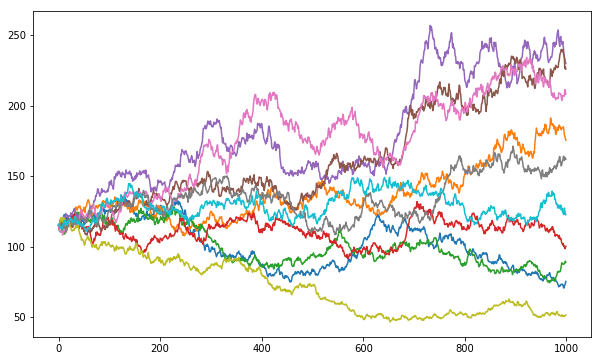

In [26]:
plt.figure(figsize=(10,6))
plt.plot(price_list)